# Comparação entre Heurísticas
------------
**Aluna:** Gabriela Mitu

### Import de Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import time

### Função para cálculo do tempo de execução

In [4]:
def roda_com_entrada(executavel, arquivo_in):
  with open(arquivo_in) as f:
    start = time.perf_counter()
    proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    stdout = proc.stdout
    

    tempo = end - start
    return (stdout, end - start)

### Comparação dos números de filmes assistidos nas maratonas

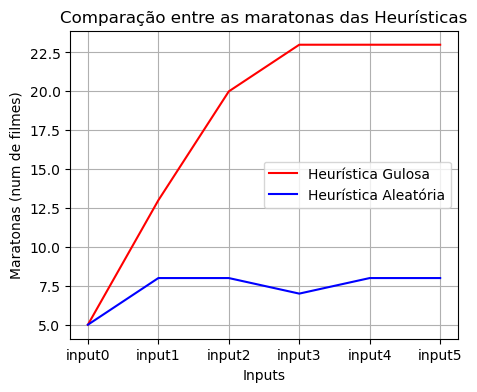

In [28]:

#INPUTS
inputs = ["input0", "input1", "input2", "input3", "input4", "input5"]

# QUANTIDADE DE FILMES NA MARATONA
# Obs.: Resultados obtidos pelos executáveis
maratonaGulosa = [5, 13, 20, 23, 23, 23]
maratonaAleatoria = [5, 8, 8, 7, 8, 8]


plt.figure(figsize=(5,4))
plt.plot(inputs, maratonaGulosa, color='red', label = "Heurística Gulosa")
plt.plot(inputs, maratonaAleatoria, color='blue', label = "Heurística Aleatória")
plt.xlabel("Inputs")
plt.ylabel("Maratonas (num de filmes)")
plt.title("Comparação entre as maratonas das Heurísticas")
plt.grid()
plt.legend()
plt.show()

### Tempo de execução em função do aumento de filmes e de categorias

In [26]:
## Arquivos de input
arqs = [f'inputs/input{i}.txt' for i in range(6)]

## ----- Heurística Gulosa -----

temposGulosa1 = [roda_com_entrada('./gulosa', arq)[1] for arq in arqs]
print("Tempos de execução da Heurística Gulosa em cada input: ")
print(temposGulosa1)
print("-"*30)

## ----- Heurística Aleatória -----

temposAleatoria1 = [roda_com_entrada('./aleatorizacao', arq)[1] for arq in arqs]
print("Tempos de execução da Heurística Aleatorizada em cada input: ")
print(temposAleatoria1)


Tempos de execução da Heurística Gulosa em cada input: 
[0.0037209230000598836, 0.0026278479999746196, 0.003388190000009672, 0.0033217690000810762, 0.007163097999978163, 0.01529735700000856]
------------------------------
Tempos de execução da Heurística Aleatorizada em cada input: 
[0.003313109000032455, 0.00265322199993534, 0.002832106000028034, 0.002921648000096866, 0.005753888999947776, 0.009419227000080355]


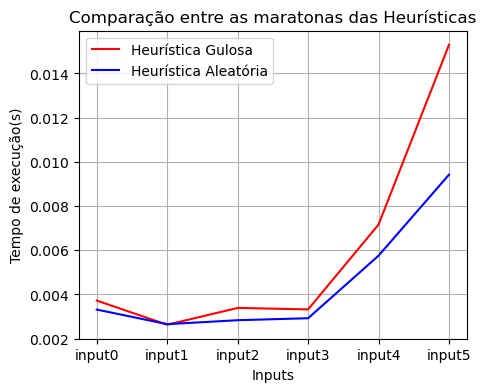

In [27]:
#INPUTS
inputs = ["input0", "input1", "input2", "input3", "input4", "input5"]


plt.figure(figsize=(5,4))
plt.plot(inputs, temposGulosa1, color='red', label = "Heurística Gulosa")
plt.plot(inputs, temposAleatoria1, color='blue', label = "Heurística Aleatória")
plt.xlabel("Inputs")
plt.ylabel("Tempo de execução(s)")
plt.title("Comparação entre as maratonas das Heurísticas")
plt.legend()
plt.grid()
plt.show()

### Tempo de tela

Aproveitamento da maratona em relação ao dia, ou seja, se foram bem ocupadas as 24h do dia assistindo filmes, considerando o input5.

In [3]:
# ------ Horas totais -----
dia = 23

## ----- Heurística Gulosa -----
duracaoT = 23
aproveitamentoG = duracaoT/dia
print(f"Tempo de Tela da Heurística Gulosa: {aproveitamentoG*100}%")

## ----- Heurística Aleatória -----
duracaoT = 8
aproveitamentoA = duracaoT/dia
print(f"Tempo de Tela da Heurística Aleatória: {aproveitamentoA*100}%")

Tempo de Tela da Heurística Gulosa: 100.0%
Tempo de Tela da Heurística Aleatória: 34.78260869565217%


## Numero de Filmes x Tempo de Execução
**Obs.:** Categorias constantes em 10, considerando os inputs da pasta "inputsCatConst"

In [20]:
## Arquivos de input
arqs = [f'inputsCatConst/input{i}.txt' for i in range(4)]

## ----- Heurística Gulosa -----

temposGulosa2 = [roda_com_entrada('./gulosa', arq)[1] for arq in arqs]
print("Tempos de execução da Heurística Gulosa em cada input: ")
print(temposGulosa2)
print("-"*30)

## ----- Heurística Aleatória -----

temposAleatoria2 = [roda_com_entrada('./aleatorizacao', arq)[1] for arq in arqs]
print("Tempos de execução da Heurística Aleatorizada em cada input: ")
print(temposAleatoria2)


Tempos de execução da Heurística Gulosa em cada input: 
[0.005117939999990995, 0.0037892730000521624, 0.008819149999965248, 0.01243154099995536]
------------------------------
Tempos de execução da Heurística Aleatorizada em cada input: 
[0.004019172999960574, 0.004242271000009623, 0.007966421999981321, 0.014167888000031326]


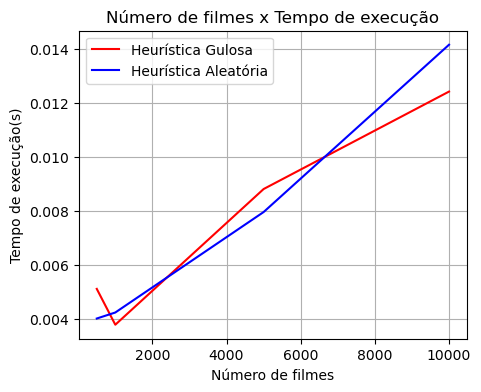

In [21]:
# QUANTIDADE DE FILMES NA MARATONA
# Obs.: Resultados obtidos pelos executáveis
numFilmes = [500, 1000, 5000, 10000]

plt.figure(figsize=(5,4))
plt.plot(numFilmes, temposGulosa2, color='red', label = "Heurística Gulosa")
plt.plot(numFilmes, temposAleatoria2, color='blue', label = "Heurística Aleatória")
plt.xlabel("Número de filmes")
plt.ylabel("Tempo de execução(s)")
plt.title("Número de filmes x Tempo de execução")
plt.grid()
plt.legend()
plt.show()

## Numero de Categorias x Tempo de Execução
**Obs.:** 
- Filmes constantes em 10000, considerando os inputs da pasta "inputsFilmesConst"
- Foi feita uma média dos tempos de execução (foi rodado 30x) em razão de que o gráfico mudava bastante de um em outro conforme rodava mais vezes

In [54]:
## Arquivos de input
arqs = [f'inputsFilmesConst/input{i}.txt' for i in range(4)]

## ----- Heurística Gulosa -----

resultadosG = []
for i in range(30):
    temposGulosa3 = [roda_com_entrada('./gulosa', arq)[1] for arq in arqs]
    resultadosG.append(temposGulosa3)

# Calcula a média de cada elemento da lista
mediaGulosa = []
for j in range(len(temposGulosa3)):
    soma = 0
    for i in range(30):
        soma += resultadosG[i][j]
    media = soma / 30
    mediaGulosa.append(media)


print("Média de tempos de execução da Heurística Gulosa de cada input: ")
print(mediaGulosa)
print("-"*30)

## ----- Heurística Aleatória -----

resultadosA = []
for i in range(30):
    temposAleatoria3 = [roda_com_entrada('./gulosa', arq)[1] for arq in arqs]
    resultadosA.append(temposAleatoria3)

# Calcula a média de cada elemento da lista
mediaAleatoria = []
for j in range(len(temposAleatoria3)):
    soma = 0
    for i in range(30):
        soma += resultadosA[i][j]
    media = soma / 30
    mediaAleatoria.append(media)

print("Média de Tempos de execução da Heurística Aleatorizada de cada input: ")
print(mediaAleatoria)


Média de tempos de execução da Heurística Gulosa de cada input: 
[0.008942232399961843, 0.008757651899971582, 0.008697496599931279, 0.00876818013330194]
------------------------------
Média de Tempos de execução da Heurística Aleatorizada de cada input: 
[0.008323025799927563, 0.008527877933314205, 0.008391844899930827, 0.008533659033340276]


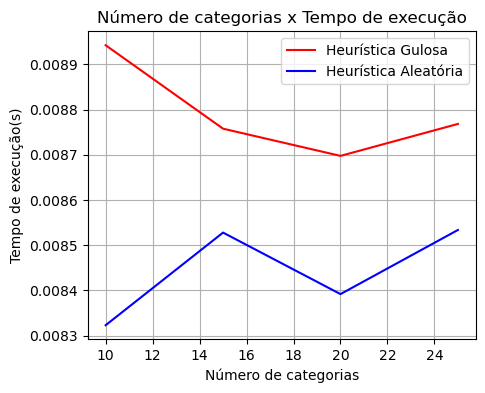

In [57]:
# QUANTIDADE DE FILMES NA MARATONA
# Obs.: Resultados obtidos pelos executáveis
numCat = [10, 15, 20, 25]

plt.figure(figsize=(5,4))
plt.plot(numCat, mediaGulosa, color='red', label = "Heurística Gulosa")
plt.plot(numCat, mediaAleatoria, color='blue', label = "Heurística Aleatória")
plt.xlabel("Número de categorias")
plt.ylabel("Tempo de execução(s)")
plt.title("Número de categorias x Tempo de execução")
plt.grid()
plt.legend()
plt.show()